<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades 

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 


Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones por pares entre las variables para considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales. 
 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [22]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Cargar datos
df_lugares = pd.read_csv('./data/lugares.csv')
df_lugares = df_lugares.set_index('Ciudad')
df_lugares.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


Como primer paso, se importan las librerías principales para el desarrollo de este taller como pandas y PCA entre otras, luego se lee el archivo de soporte llamado "lugares.csv" y se guardan los datos en un dataframe. Finalmente, como se están evaluando ciudades diferentes, se definió la columna Ciudad como el índice del dataframe.

### 2.  Análisis descriptivo de las variables. 

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables. 

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.
 
Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

#### 2.1. Reconocimiento de los datos

Para familiarizarse con la información suministrada, en primer lugar se utiliza la función `shape` con el fin de obtener las dimensiones de la base de datos. Al ejecutar este comando se observa que la base de datos cuenta con 329 observaciones y 10 variables.

In [23]:
df_lugares.shape

(329, 9)

Como existen 9 variables en nuestro dataset, se calcula el número de gráficas de dispersión bivariadas que se deberían examinar:

$\left(\left(\begin{array}{c}
9\\
2
\end{array}\right)=\frac{9\times8}{2}=36\right)$

Por otra parte, se usa la función `head()` para observar las primeras observaciones y familiarizarse con la información. De aquí se puede concluir que la primera variable es cualitativa y el resto de las variables son de tipo cuantitativo. Así mismo, se observa que cada una de las filas de esta base de datos corresponde a una ciudad. Para las variables numéricas, se buscó documentación sobre esta base de datos para entender si correspondían a una puntuación o una escala común, pero lo encontrado muestra que son indicadores compuestos.

In [24]:
df_lugares.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


Adicionalmente, se trató de identificar la presencia de valores faltantes. A continuación se muestra que no los hay, a menos que estos valores tengan algún código especial (por ejemplo un código numérico)

In [25]:
df_lugares.isnull().mean()*100

Clima y Terreno                            0.0
Alojamiento                                0.0
Cuidado de la salud y el medio ambiente    0.0
Crimen                                     0.0
Transporte                                 0.0
Educación                                  0.0
Artes                                      0.0
Recreación                                 0.0
Economía                                   0.0
dtype: float64

#### 2.2. Estadísticas descriptivas

Para encontrar los estadísticos descriptivos, se usó la función `describe`. Algunas conclusiones que se pueden extraer de aquí son:

- No hay variables con datos faltantes, pues todas cuentan con 329 observaciones.
- En tres casos el valor de la mediana es similar al valor de la media: Clima y terreno, Educación y Economía. Esto puede sugerir distribuciones simétricas para estas variables.
- En la mayor parte de los casos la media tiende a estar por encima de la mediana, lo que sugiere que la distribución tiene asimetrías hacia la derecha.
- La variable Artes cuenta con una dispersión demasiado elevada. Esto se puede ver ya que su desviación estándar es mucho más alta que su promedio. Además el valor máximo está muy por encima del promedio lo que sugiere que dicha dispersión se debe a valores atípicos muy altos.
- Ninguna variable cuenta con valores negativos y esto se puede observar con los valores mínimos.

In [26]:
# Análisis descriptivo de los datos
stats_lugares = df_lugares.describe().T
print('Se procede a calcular las principales medidas de tendencia central de los datos:')
display(stats_lugares)


Se procede a calcular las principales medidas de tendencia central de los datos:


,count,mean,std,min,25%,50%,75%,max
Clima y Terreno,329.0,538.732523,120.808259,105.0,480.0,542.0,592.0,910.0
Alojamiento,329.0,8346.559271,2385.262622,5159.0,6760.0,7877.0,9015.0,23640.0
Cuidado de la salud y el medio ambiente,329.0,1185.738602,1003.002036,43.0,583.0,833.0,1445.0,7850.0
Crimen,329.0,961.054711,357.154186,308.0,707.0,947.0,1156.0,2498.0
Transporte,329.0,4210.082067,1451.179240,1145.0,3141.0,4080.0,5205.0,8625.0
Educación,329.0,2814.887538,320.792953,1701.0,2619.0,2794.0,3012.0,3781.0
Artes,329.0,3150.884498,4642.283738,52.0,778.0,1871.0,3844.0,56745.0
Recreación,329.0,1845.957447,807.888171,300.0,1316.0,1670.0,2176.0,4800.0
Economía,329.0,5525.364742,1084.468523,3045.0,4842.0,5384.0,6113.0,9980.0


Como se sugería en el análisis de la media y la mediana, hay tres variables con distribución simétrica, en forma de campana. Estas son Clima y terreno, Educación y Economía. El resto de las variables cuenta con distribuciones asimétricas hacia la derecha, especialmente en la variable Artes. En este caso, resulta viable graficar las combianciones de diagramas de dispersión ya que solo se cuentan con 9 variables, por lo tanto, serían solo 36 gráficos diferentes. Por otra parte, la matriz de correlaciones muestra que en general no hay correlaciones fuertes entre las variables siendo la más fuete la de la variable de Cuidado de salud y medio ambiente con Artes, mientras que el resto de las correlaciones son todas positivas (excepto economía con clima y terreno) y con valores por debajo de 0.5.

Se grafican boxplots para tener una mejor visualización de la dispersión de las variables


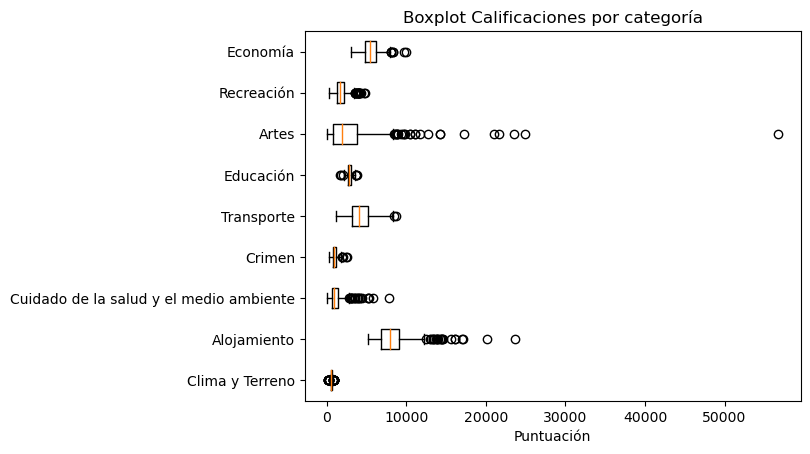

También se grafica un mapa de calor de correlaciones entre las variables


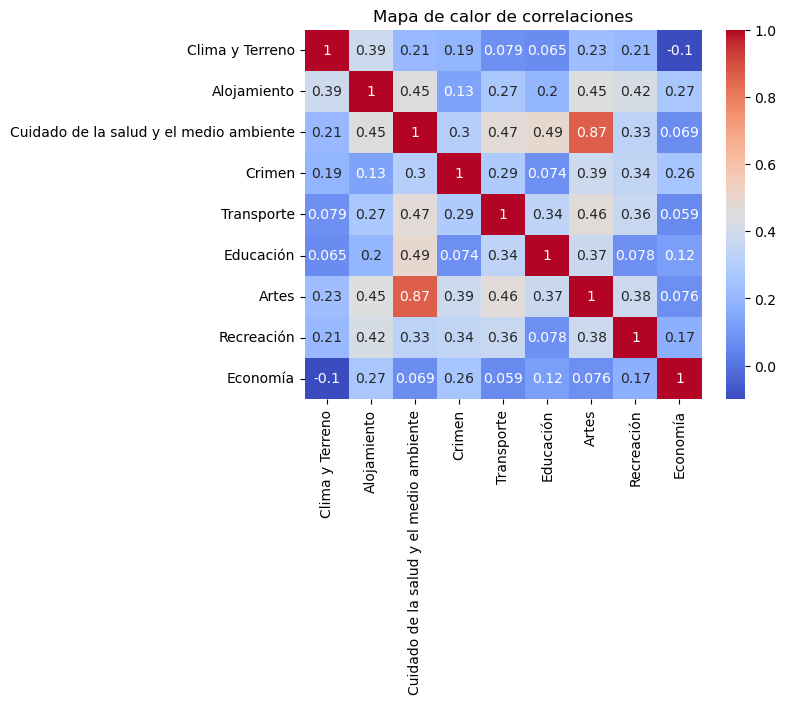

Finalmente, se grafica un pairplot para observar la relación entre variables


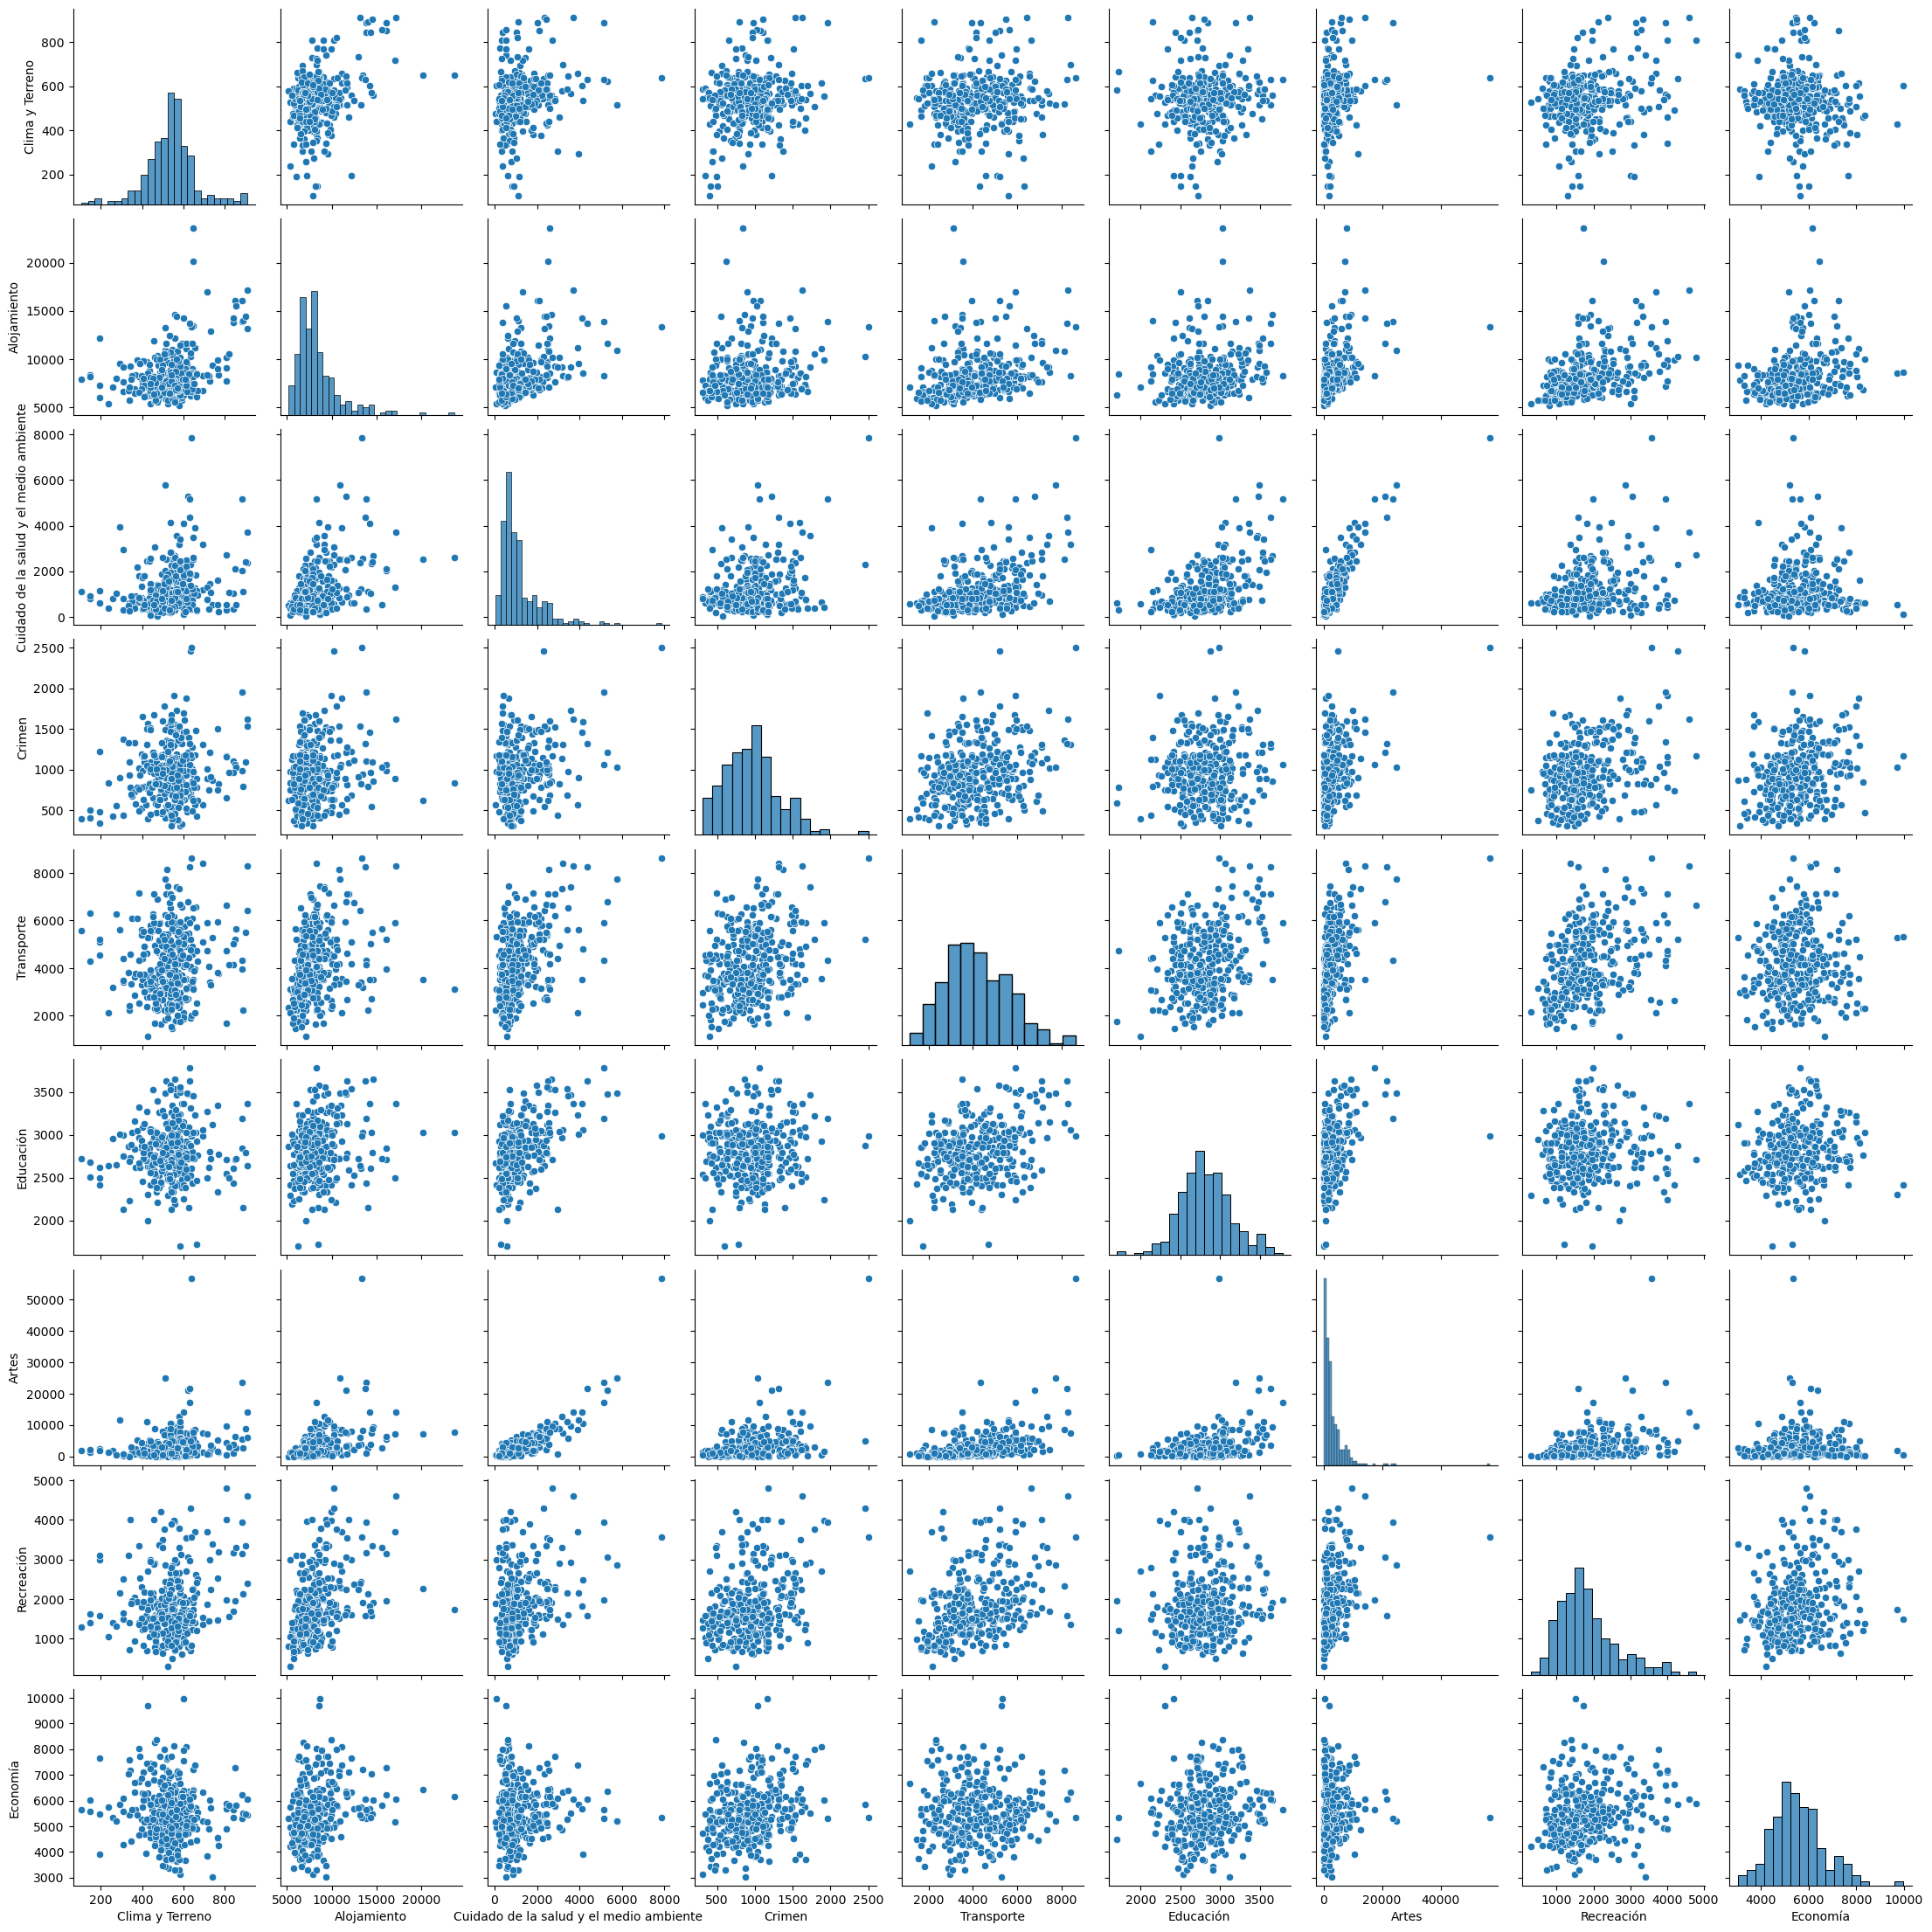

In [27]:
# Boxplot para las categorías de puntuación
print('Se grafican boxplots para tener una mejor visualización de la dispersión de las variables')
plt.boxplot(df_lugares, vert=False, labels=df_lugares.columns)
plt.title('Boxplot Calificaciones por categoría')
plt.xlabel('Puntuación')
plt.show()

# Mapa de calor para la correlación
print('También se grafica un mapa de calor de correlaciones entre las variables')
sns.heatmap(df_lugares.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

# Graficar pairplot
print('Finalmente, se grafica un pairplot para observar la relación entre variables')
sns.pairplot(df_lugares)
plt.show()

### Importancia de Calcular estadísticas descriptivas antes de un PCA

Comprensión de los datos: Antes de realizar cualquier tipo de análisis, es crucial comprender la naturaleza de los datos con los que se está trabajando. Las estadísticas descriptivas brindan información sobre la distribución, la dispersión y las características generales de las variables en un conjunto de datos. Esto ayuda a identificar posibles anomalías, patrones inusuales o valores atípicos que podrían afectar la interpretación y el resultado del PCA.

Identificación de valores atípicos: Los valores atípicos pueden tener un impacto significativo en el resultado del PCA al afectar las medidas de distancia y varianza. Al construir estadísticas descriptivas, se pueden identificar valores atípicos y decidir cómo manejarlos adecuadamente antes de realizar PCA.

Selección de variables: Las estadísticas descriptivas ayudan a identificar las variables que tienen una varianza baja o cercana a cero. Estas variables podrían no contribuir significativamente a la variabilidad total de los datos y, por lo tanto, podrían no ser útiles para el análisis de PCA.

### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso. 

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

Para comenzar el procedimiento, antes de realizar el análisis de componente principales se debe realizar un proceso de estandarización. En este caso la estandarización consiste en restar a cada variable su media y dividir el resultado entre el promedio.

In [28]:
mu = df_lugares.mean()
sigma = df_lugares.std()
Z = (df_lugares - mu)/sigma
Z.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",-0.146782,-0.899926,-0.945899,-0.106550,-0.123405,-0.180451,-0.464186,-0.545815,1.943473
"Akron,OH",0.300207,-0.087437,0.468854,-0.210147,0.463704,-1.174862,0.519812,0.972960,-1.083816
"Albany,GA",-0.585494,-0.422410,-0.566039,0.025046,-1.157047,-0.794555,-0.627683,-1.221651,-0.253917
"Albany-Schenectady-Troy,NY",-0.519273,-0.183862,0.244527,-0.982922,1.841894,1.820839,0.324003,-0.283402,0.312259
"Albuquerque,NM",0.995524,0.019470,0.665264,1.461400,1.617938,0.658096,0.289753,0.948204,0.185930


Con el fin de verificar que el proceso de estandarización fue adecuado se construyen las estadísticas descriptivas para la matriz Z, en efecto, el valor de la media da igual a 0 y la desviación estándar da igual a 1 para todas las variables.

In [29]:
Z.describe()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
count,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02,3.290000e+02
mean,2.483660e-16,3.887468e-16,-2.159704e-17,1.511793e-16,-3.158568e-16,2.686132e-16,2.159704e-17,-2.699630e-17,-3.563512e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.590256e+00,-1.336356e+00,-1.139318e+00,-1.828495e+00,-2.112132e+00,-3.472294e+00,-6.675345e-01,-1.913579e+00,-2.287171e+00
25%,-4.861631e-01,-6.651508e-01,-6.009346e-01,-7.113306e-01,-7.366988e-01,-6.106354e-01,-5.111459e-01,-6.559787e-01,-6.301379e-01
50%,2.704680e-02,-1.968585e-01,-3.516828e-01,-3.935194e-02,-8.963887e-02,-6.511221e-02,-2.757015e-01,-2.177993e-01,-1.303539e-01
75%,4.409258e-01,2.802378e-01,2.584854e-01,5.458295e-01,6.855927e-01,6.144538e-01,1.493049e-01,4.085250e-01,5.418647e-01
max,3.073196e+00,6.411638e+00,6.644315e+00,4.303310e+00,3.042297e+00,3.011639e+00,1.154477e+01,3.656499e+00,4.107667e+00


A partir de la matriz Z se calcula la matriz de varianzas y covarianzas la cual debido al proceso de estandarización equivale a la matriz de correlaciones.

In [30]:
S = Z.cov()
S

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Clima y Terreno,1.000000,0.386291,0.213303,0.192387,0.079120,0.064520,0.226974,0.213509,-0.100083
Alojamiento,0.386291,1.000000,0.453010,0.134222,0.271922,0.197934,0.448568,0.422288,0.269433
Cuidado de la salud y el medio ambiente,0.213303,0.453010,1.000000,0.304659,0.470317,0.490234,0.865796,0.325397,0.069271
Crimen,0.192387,0.134222,0.304659,1.000000,0.286578,0.074416,0.389483,0.344627,0.259995
Transporte,0.079120,0.271922,0.470317,0.286578,1.000000,0.335992,0.464806,0.364716,0.059247
Educación,0.064520,0.197934,0.490234,0.074416,0.335992,1.000000,0.373279,0.077807,0.119700
Artes,0.226974,0.448568,0.865796,0.389483,0.464806,0.373279,1.000000,0.378659,0.075673
Recreación,0.213509,0.422288,0.325397,0.344627,0.364716,0.077807,0.378659,1.000000,0.173531
Economía,-0.100083,0.269433,0.069271,0.259995,0.059247,0.119700,0.075673,0.173531,1.000000


Con la matriz S se utilizan las funciones de álgebra lineal de numpy para construir los valores propios y los vectores propios correspondientes, se muestran los resultados para los valores propios.

In [31]:
eig_val, eig_vec = np.linalg.eig(S)
eig_val

array([3.4082918 , 1.21397617, 1.14147915, 0.92091782, 0.75328488,
       0.6305619 , 0.49304772, 0.31803849, 0.12040208])

Para verificar que los valores propios obtenidos son correctos se mostratrá que es posible recuperar la matriz S a partir de ellos. En primer lugar se calcula una matriz diagonal con estos valores propios.

In [32]:
eig_val_diag = np.diag(eig_val)
eig_val_diag

array([[3.4082918 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.21397617, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.14147915, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.92091782, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.75328488,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.6305619 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.49304772, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.31803849, 0.        ],


A continuación, se multiplica la matriz de vectores propios por la matriz diagonal recién calculada y por la matriz de vectores propios transpuesta. El resultado es equivalente a la matriz de varianzas y covarianzas S.

In [33]:
eig_vec.dot(eig_val_diag).dot(eig_vec.T)

array([[ 1.        ,  0.3862907 ,  0.21330254,  0.19238731,  0.07911993,
         0.06451976,  0.2269742 ,  0.21350903, -0.10008274],
       [ 0.3862907 ,  1.        ,  0.45300968,  0.13422166,  0.2719215 ,
         0.19793386,  0.44856777,  0.42228838,  0.26943277],
       [ 0.21330254,  0.45300968,  1.        ,  0.30465943,  0.47031707,
         0.49023403,  0.86579604,  0.32539695,  0.06927074],
       [ 0.19238731,  0.13422166,  0.30465943,  1.        ,  0.28657843,
         0.07441627,  0.38948261,  0.34462654,  0.25999471],
       [ 0.07911993,  0.2719215 ,  0.47031707,  0.28657843,  1.        ,
         0.3359925 ,  0.46480557,  0.36471624,  0.05924675],
       [ 0.06451976,  0.19793386,  0.49023403,  0.07441627,  0.3359925 ,
         1.        ,  0.37327898,  0.07780718,  0.11970035],
       [ 0.2269742 ,  0.44856777,  0.86579604,  0.38948261,  0.46480557,
         0.37327898,  1.        ,  0.37865945,  0.0756733 ],
       [ 0.21350903,  0.42228838,  0.32539695,  0.34462654,  0

Una vez comprobado que el cálculo de los valores propios es correcto se procede a calcular la proporción de la varianza explicada por cada componente. En este caso, el primer componente explica el 37.9% de la varianza, el segundo el 13.5%, el tercero el 12.7% y el cuarto el 10.23%. Entre estos cuatro primeros componentes se suma el 74% de la varianza total, lo cual se encuentra dentro del criterio del 70 al 90% por lo cual se eligen estos cuatro componentes para continuar con la construcción.

In [34]:
# Proporción de la varianza explicada
eig_val/sum(eig_val)

array([0.37869909, 0.13488624, 0.12683102, 0.1023242 , 0.08369832,
       0.07006243, 0.05478308, 0.03533761, 0.01337801])

Ya que el primer componente se encuentra en la posición 0 se utiliza esta información para extraer los loadings a través de los vectores propios correspondientes y se calcula el resultado del primer componente multiplicando estos pesos por los valores de la matriz Z. Este mismo procedimiento se implementa para los 3 componentes restantes.

In [35]:
#Loadings
eig_vec=eig_vec.T
eig_vec[[0]]

array([[0.20641395, 0.35652161, 0.46021465, 0.28129838, 0.35115078,
        0.27529264, 0.46305449, 0.32788791, 0.13541225]])

In [36]:
f1=Z.dot(eig_vec[[0]].T) #calculamos f1
f1.columns = ['CP1'] #nombramos la columna del primer componente como CP1
f1.sort_values(by='CP1', ascending=False).head()

,CP1
Ciudad,
"New-York,NY",12.426251
"San-Francisco,CA",7.391403
"Los-Angeles,Long-Beach,CA",7.246307
"Chicago,IL",6.464912
"Boston,MA",6.301057


In [37]:
#Segundo componente
f2=Z.dot(eig_vec[[1]].T) #calculamos f2
f2.columns = ['CP2'] #nombramos la columna del segundo componente como CP2
f2.sort_values(by='CP2', ascending=False).head()

,CP2
Ciudad,
"Las-Vegas,NV",3.339066
"Atlantic-City,NJ",3.048975
"Midland,TX",3.029992
"Salinas-Seaside-Monterey,CA",2.873618
"Lafayette,LA",2.541852


In [38]:
#Tercer componente
f3=Z.dot(eig_vec[[2]].T) #calculamos f3
f3.columns = ['CP3'] #nombramos la columna del tercer componente como CP3
f3.sort_values(by='CP3', ascending=False).head()

,CP3
Ciudad,
"Oxnard-Ventura,CA",3.280908
"San-Diego,CA",2.585000
"Eugene-Springfield,OR",2.442511
"Santa-Cruz,CA",2.421261
"Salinas-Seaside-Monterey,CA",2.407963


In [39]:
#Cuarto componente
f4=Z.dot(eig_vec[[3]].T) #calculamos f4
f4.columns = ['CP4'] #nombramos la columna del cuarto componente como CP4
f4.sort_values(by='CP4', ascending=False).head()

,CP4
Ciudad,
"Stamford,CT",4.241359
"Norwalk,CT",3.712375
"Danbury,CT",3.082428
"Portsmouth-Dover-Rochester,NH-ME",2.885528
"Bergen-Passaic,NJ",2.607212


### Criterio de Selección del número de componentes principales

Como se mencionó anteriormente se decidió elegir los 4 primeros componentes debido a que entre ellos se supera el 70% de la varianza total explicada. Si se quisiera dar argumentos adicionales se puede recurrir al criterio de Kaiser. En este caso, los tres primeros componentes presentaron valores por encima de 1 pero sería sensato también incluir el cuarto ya que presenta un valor cercano a 1 (0.9) y además su inclusión permite que se cruce el umbral del 70% de la varianza explicada.

### 4.  Interpretación de los componentes principales. 

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, los pesos obtenidos pueden identificar dimensiones menores de los datos? Dé una interpretación a estas dimensiones, para ello puede utilizar gráficas, tablas, etc.

In [40]:
# Unir dataframes de componentes
cp = f1.join(f2).join(f3).join(f4)
cp

,CP1,CP2,CP3,CP4
Ciudad,,,,
"Abilene,TX",-1.040180,0.893769,-1.436654,0.509834
"Akron,OH",0.439814,0.075066,1.154717,-1.112207
"Albany,GA",-1.875539,0.069792,-0.073347,-0.046232
"Albany-Schenectady-Troy,NY",0.910741,-1.817582,-1.096147,0.573581
"Albuquerque,NM",2.149248,0.328858,-0.019738,-1.031502
...,...,...,...,...
"Worcester,MA",-0.140983,-1.642143,0.230877,1.224202
"Yakima,WA",-1.132624,0.739830,0.319330,-1.115428
"York,PA",-1.708201,-0.904933,0.657982,1.340779


Inicialmente se tenían 9 columnas. Después de realizar el ejercicio y evaluar diferentes componentes, se llegó a la conclusión de poder reducir las dimensiones a 4 componentes principales. En otras palabras, sí se logró reducir la dimensión en el ejercicio hecho anteriormente.

In [41]:
# Dataframe que contiene los eigevectores de los eigevalores seleccionados
loadings = pd.DataFrame(index=df_lugares.columns)
loadings['CP1'] = eig_vec[0]
loadings['CP2'] = eig_vec[1]
loadings['CP3'] = eig_vec[2]
loadings['CP4'] = eig_vec[3]
loadings

,CP1,CP2,CP3,CP4
Clima y Terreno,0.206414,0.217835,0.689956,0.137321
Alojamiento,0.356522,0.250624,0.208172,0.511829
Cuidado de la salud y el medio ambiente,0.460215,-0.299465,0.007325,0.014702
Crimen,0.281298,0.355342,-0.185105,-0.539050
Transporte,0.351151,-0.179604,-0.146376,-0.302904
Educación,0.275293,-0.483382,-0.229703,0.335411
Artes,0.463054,-0.194790,0.026484,-0.101080
Recreación,0.327888,0.384475,0.050853,-0.189801
Economía,0.135412,0.471283,-0.607314,0.421770


La tabla anterior muestra el desgloce de cada componente principal con respecto a las variables que se están trabajando ya que cada componente puede decirse que es una combinación lineal de las variables para explicar la varianza de los datos, se puede observar que para el primer componente, la variable más representativa es el puntaje de Artes seguido por el puntaje de Cuidado de la salud y el medio ambiente.

El componente 2 tiene grandes pesos y por ende mayor representatividad de las variables Educación, Economía y Recreación mientras que el componente 3 representa en mayor medida la varianza que aporta la variable Clima y Terreno y el componente 4 representa mejor las variables Crimen y Alojamiento.

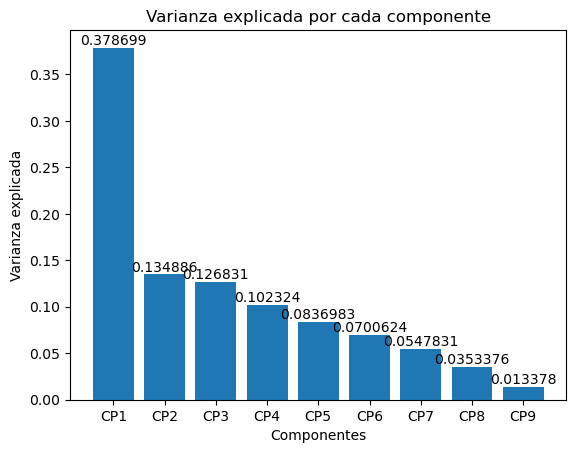

In [42]:
var_explicada = eig_val/sum(eig_val)
componentes = ['CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CP7', 'CP8', 'CP9']
fig, ax = plt.subplots()
barras = ax.bar(componentes, height=var_explicada)
ax.set_title('Varianza explicada por cada componente')
ax.set_xlabel('Componentes')
ax.set_ylabel('Varianza explicada')
ax.bar_label(barras, label_type='edge')
plt.show()

[scatterd] >INFO> Hex [[0, 0, 0]] should be of type string
[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


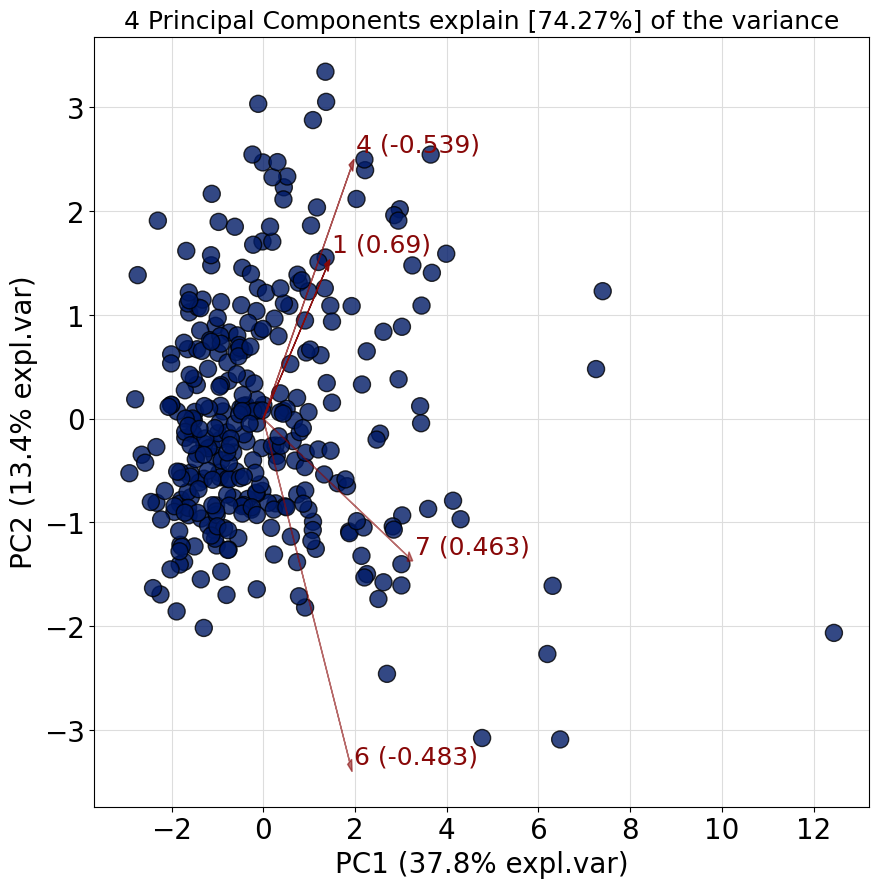

In [45]:
from pca import pca
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = scaler.fit_transform(df_lugares)

# Inicializar el objeto PCA
model = pca(n_components=4)

#Ajustar el PCA a los datos
df_pca = model.fit_transform(df_std, verbose=False)

# Creación de biplot
fig, ax = model.biplot(n_feat=4, legend=False, figsize=(10,10))

### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

Para poder responder este interrogante lo primero que vamos a hacer es calcular las distancias euclidianas en base a los 4 componentes principales calculados y seleccionados. Una vez calculadas las distancias, identificaremos las 5 ciudades con calidades de vida inusuales (outliers). Ya que en base a este criterio de distancia euclidadiana la cual logra ser una herramienta estadística mucho más objetiva para demostrar cuales son las observaciones totalmente fuera de lo común. Habiendolas marcado en el dataset las graficaremos en color rojo para tener una visualización clara de como se distancian de las demás que estaran en color azul.

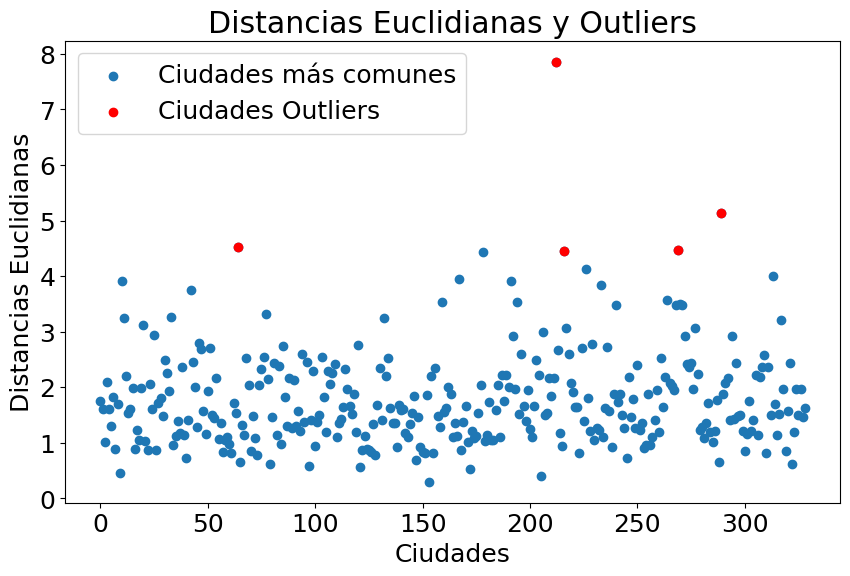

Índices de los puntos inusuales:
[212 289  64 269 216]

Valores de las variables para los puntos inusuales:
                        CP1       CP2       CP3       CP4
Ciudad                                                   
New-York,NY       12.426251 -2.061746  0.209764 -3.425504
Stamford,CT        3.446100  1.088263  1.657399  4.241359
Chicago,IL         6.464912 -3.087134 -0.391669 -0.390163
San-Francisco,CA   7.391403  1.227000  1.691752  0.405878
Norwalk,CT         3.019501  0.884319  1.295291  3.712375


In [76]:
# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cp)

# Calcular distancias euclidianas
distances = np.linalg.norm(data_scaled - np.mean(data_scaled, axis=0), axis=1)

# Ordenar índices por distancia en orden descendente
sorted_indices = np.argsort(distances)[::-1]

# Tomar los 5 primeros puntos como outliers
num_outliers = 5
outlier_indices = sorted_indices[:num_outliers]

# Crear una gráfica de dispersión con outliers resaltados
plt.figure(figsize=(10, 6))
plt.scatter(range(len(distances)), distances, label='Ciudades más comunes')
plt.scatter(outlier_indices, distances[outlier_indices], color='red', label='Ciudades Outliers')
plt.xlabel('Ciudades')
plt.ylabel('Distancias Euclidianas')
plt.title('Distancias Euclidianas y Outliers')
plt.legend()
plt.show()

# Imprimir los índices de los puntos inusuales
print("Índices de los puntos inusuales:")
print(outlier_indices)
print("\nValores de las variables para los puntos inusuales:")
print(cp.iloc[outlier_indices])

Ya habiendo indentificado las 5 ciudades recordemos a su vez que variables explican más los componentes respectivos para poder interpretar con mayor facilidad y esto se podria resumir de la siguiente manera:

#### Ciudades con calidad de vida inusuales

* 'New-York,NY' => Esta ciudad la indentifica más el CP1: **+12.42** (Artes + Salud/Ambiente) y el CP4 con **-3.42** (Crimen + Alojamiento)
* 'Stamford,CT' => Esta ciudad la indentifica más el CP1: **+3.44** (Artes + Salud/Ambiente) y el CP4 con **4.24** (Crimen + Alojamiento)
* 'Chicago,IL'  => Esta ciudad la indentifica más el CP1: **+6.46** (Artes + Salud/Ambiente) y el CP2 con **-3.08** (Educación + Economia + Recreación)
* 'San-Francisco,CA' => Esta ciudad la indentifica más el CP1: **+7.39** (Artes + Salud/Ambiente) y el CP3 con **+1.69** (Clima y Terreno)
* 'Norwalk,CT' => Esta ciudad la indentifica más el CP1: **+3.01** (Artes + Salud/Ambiente) y el CP4 con **+3.71** (Crimen + Alojamiento)

Posteriormente, filtraremos sus valores originales de cada una de las variables que hacen parte de los componentes y compararemos los resultados versus las medidades de tedencia central.

In [77]:
# Ciudades específicas que deseas filtrar
ciudades_especificas = ['New-York,NY', 'Stamford,CT', 'Chicago,IL', 'San-Francisco,CA', 'Norwalk,CT']

# Filtrar el DataFrame por las ciudades específicas
df_filtrado = df_lugares.loc[ciudades_especificas]

display(df_filtrado)

display(stats_lugares)

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"New-York,NY",638,13358,7850,2498,8625,2984,56745,3579,5338
"Stamford,CT",648,23640,2610,835,3110,3029,7865,1729,6158
"Chicago,IL",514,10913,5766,1034,7742,3486,24846,2856,5205
"San-Francisco,CA",910,17158,3726,1619,8299,3371,14226,4600,6063
"Norwalk,CT",648,20151,2530,625,3536,3029,7273,2268,6432


,count,mean,std,min,25%,50%,75%,max
Clima y Terreno,329.0,538.732523,120.808259,105.0,480.0,542.0,592.0,910.0
Alojamiento,329.0,8346.559271,2385.262622,5159.0,6760.0,7877.0,9015.0,23640.0
Cuidado de la salud y el medio ambiente,329.0,1185.738602,1003.002036,43.0,583.0,833.0,1445.0,7850.0
Crimen,329.0,961.054711,357.154186,308.0,707.0,947.0,1156.0,2498.0
Transporte,329.0,4210.082067,1451.179240,1145.0,3141.0,4080.0,5205.0,8625.0
Educación,329.0,2814.887538,320.792953,1701.0,2619.0,2794.0,3012.0,3781.0
Artes,329.0,3150.884498,4642.283738,52.0,778.0,1871.0,3844.0,56745.0
Recreación,329.0,1845.957447,807.888171,300.0,1316.0,1670.0,2176.0,4800.0
Economía,329.0,5525.364742,1084.468523,3045.0,4842.0,5384.0,6113.0,9980.0


Con base a las tablas anteriores podemos afirmar lo siguiente de cada una de las las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual:

* 'New-York,NY':
    * CP1(**+12.42**) = En cuidado y salud junto con Artes toma el valor maximo en las calificaciones respectivamente: 7850 y 56745 
    * CP4(**-3.42**) = En Crimen toma el maximo valor con 2498 y en Alojamiento con 13358 se situa en estar en las ciudades con el 25% más alto de mayor calificación en este eje.
    
* 'Stamford,CT' por su lado aunque son los mismos componentes CP1 y CP4 que la identifican versus NewYork en CP4 se comporta de manera contaria por su signo el cual es +:
    * CP1(**+3.44***) = En cuidado y salud con  2610 y Artes con 7865 estas se situan en estar en las ciudades con el 25% más alto de mayor calificación.
    * CP4(**+4.24**) = En Crimen toma un valor de 835 por debajo de la media (961) y en Alojamiento toma el valor maximo con 23640. Con esto podemos concluir que no tiene tanta criminalidad como NewYork por tanto afecta la calidad de vida de manera inusual.

* 'Chicago,IL' por su lado se indentifica por:
    * CP1(**+6.46***) = En cuidado y salud con 5766 y Artes con 24846 estas se situan en estar en las ciudades con el 25% más alto de mayor calificación.
    * CP2(**-3.08**) = Educación con 3486 esta muy cercana al maximo (3781) + Economia con 5205 muy cerca a la media(5525) + Recreación con 2856 en el 25% mejor calificada en este eje. 

* 'San-Francisco,CA' se indentifica por:
   * CP1(**+7.39***) = En cuidado y salud con 3726 y Artes con 14226 estas se situan en estar en las ciudades con el 25% más alto de mayor calificación en ambas variables.
    * CP3(**+1.69**) = Clima y Terreno con 910 toma el valor maximo de la calificación apreciada por las personas. 

* 'Norwalk,CT':
    *  CP1(**+3.01**) = En cuidado y salud con  2610 y Artes con 7865 estas se situan en estar en las ciudades con el 25% más alto de mayor calificación.
    * CP4(**+3.71**) = En Crimen toma un valor de 835 por debajo de la media (961) y en Alojamiento toma el valor maximo con 23640. Con esto podemos concluir que no tiene tanta criminalidad como NewYork por tanto afecta la calidad de vida de manera inusual.